<a href="https://colab.research.google.com/github/geryabra/DataVisualization/blob/main/Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐼 Into to Pandas


## 🎯 This Lesson's Goal

Although this course does not focus on data manipulation, there will definitely be times when we need to process our data files a bit before we can create the visualization we want.


*   Clean data
*   Delete duplications
*   Make some calulations and aggregations
*   etc...


It is very comfortable to do all these actions in 🐼 __Pandas__ - an open source data analysis and manipulation tool,
built on top of the Python programming language.

Therefore, this lesson's goal is to get to know the basic functionalities of

🏅 We will do it by going through the Nobel Prise Winners dataset.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
import os
import socket
socket.gethostname()

'8a22abb03723'

## Connecting to Google Drive

In [ ]:
# The following comand gives to Colab access to your google drive.
# After running it, you'll be prompted to authorize access.
# Once authorized, you can access your Google Drive files in the /content/drive/My Drive/ directory.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Assigning to the variable named "path" the full path of our file
You can find and copy your file's path by clicking on the folder icon on the left bar AFTER you've mount your drive.

In [ ]:
path = "/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/NobelWinnersA.json"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data
We can read data usign any of the following Pandas functions:


*   `read_csv('path_to_your_file.csv')`
*   `read_json('path_to_your_file.json')`
*   `pd.read_excel('path_to_your_file.xlsx', sheet_name='your_sheet_name')`
*   `pd.read_html('http://example.com/table.html')`
*   And many more! We encourage you to ask your favorit AI 🤖: <br> "What other functions similar to read_csv() can we use to read data into Pandas?"<br>
and read the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)



Our dataset is in the form of a JSON file, therefore we will be using `read_json()` to read our data into Pandas.  

In [ ]:
# Reading the JSON file using pandas' read_json() function.
nbl = pd.read_json(path)

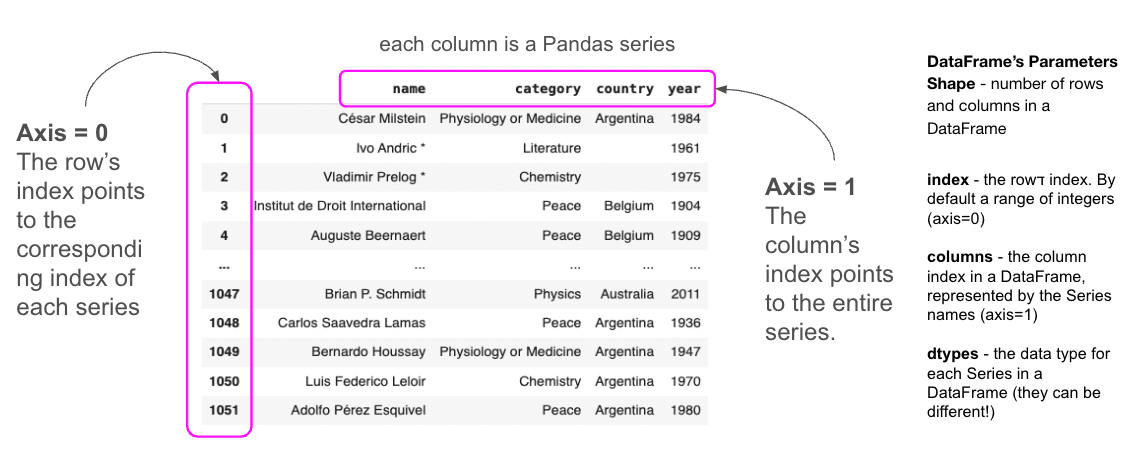

❓ __Question:__ What do you think the object `type` of nbl is?<br>
Whenever I have an object and I am not sure of what type it is, I can run `type()`


In [ ]:
type(nbl)

pandas.core.frame.DataFrame

## Getting some intuition about the dataset

Once I loaded the data, I want see a few rows and start to ask some questions about the dataframe

*   How many rows and columns?   
*   What are the columns names?
*   Columns types?
*   How do the values of each column looks like?  
*   What is the summary statistics of each numerical column?  
*   Get a summary of the values in the non numerical columns.  
*   Are there any missing values?  
*   Are there any duplicated rows?  


### `df.shape` How many rows and columns in my DataFrame?

Knowing the shape and dimensions of your DataFrame is crucial because it provides a quick overview of the dataset's size and structure, allowing you to understand the volume of data you are working with.<br>

Using `df.shape` in Pandas is a quick and easy way to get the dimensions of your DataFrame. `df.shape` returns a tuple representing the dimensions of the DataFrame: `(number_of_rows, number_of_columns)`

In [ ]:
# Getting the shape of the dataframe
print(f"This is the shape's tuple: {nbl.shape}")

# We can get the number of rows and columns separately by indexing the
# shape tuple as follows:
print(f'The dataframe contains {nbl.shape[0]} rows & {nbl.shape[1]} columns')

This is the shape's tuple: (1052, 12)
The dataframe contains 1052 rows & 12 columns


In [ ]:
nbl.shape

(1052, 12)

In [ ]:
type(nbl.shape)

tuple

In [ ]:
len(nbl)

1052

## What are the column names?

Before we proceed to take a look at some values in our dataframe, we should look at the column names. Knowing the column names in a DataFrame is essential because it allows you to understand the structure and develop some expectation to how the values in each column should look like.

❗❗❗Confronting your expectations with reality is a key principle when analyzing data ❗❗❗

### `df.columns`

To see the columns names we can use `df.columns`provides a list of all column names in a DataFrame<br>
the `Index` refers to the columns index, and `dtype=object'` indicates that these column indexes are of type `object` which in our case also means `string`.

In [ ]:
nbl.columns

Index(['born_in', 'category', 'country', 'date_of_birth', 'date_of_death',
       'gender', 'link', 'name', 'place_of_birth', 'place_of_death', 'text',
       'year'],
      dtype='object')

In [ ]:
type(nbl.columns)

pandas.core.indexes.base.Index

You can extract a single name with an index

In [ ]:
nbl.columns[3]

'date_of_birth'

## What is the data type of each column?

In Pandas the columns can take one of the following data types (or `dtypes`)

*   float64
*   int64
*   datetime64[ns] (datetime)
*   object (string)
*   Columns with mixed types are stored with the object dtype

See [documentatio](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

Knowing the columns' `dtypes` allows us to

*   Identify potential issues, such as incorrect data types that may need conversion
*   Helps in selecting appropriate methods for data manipulation and analysis based on the column types


### Use `df.dtypes` to see the columns' types

In [ ]:
nbl.dtypes

,0
born_in,object
category,object
country,object
date_of_birth,object
date_of_death,object
gender,object
link,object
name,object
place_of_birth,object
place_of_death,object


In [ ]:
titanic = sns.load_dataset("titanic")
# you can find all seaborn's datasets here https://github.com/mwaskom/seaborn-data

In [ ]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


### `df.info()` will give us some more details

*   the range of the index
*   total number of columns
*   the position of each column
*   the name of each column
*   how many non-null in the column
*   the column's dtype
*   summary of dtypes
*   amount of memory the dataframe takes




In [ ]:
nbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   born_in         1052 non-null   object
 1   category        1052 non-null   object
 2   country         1052 non-null   object
 3   date_of_birth   1044 non-null   object
 4   date_of_death   1044 non-null   object
 5   gender          1040 non-null   object
 6   link            1052 non-null   object
 7   name            1052 non-null   object
 8   place_of_birth  1044 non-null   object
 9   place_of_death  1044 non-null   object
 10  text            1052 non-null   object
 11  year            1052 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 98.8+ KB


❓__Question__ just from looking at `df.info()`:

*   Why 12 rows have no `gender`?




## Viewing few rows
One of the first things we want to do when we start to explore a dataset is to view the content of some of the rows. <br>
It will help us

*   Understand the structure of the data
*   Identify any obvious issues or patterns
*   Get a sense of the types of values present in each column

We can use the following Pandas functions to obtain that:<br>

*   `df.head()` - shows the first 5 rows <br>
you can see more or less rows by inserting a number to the function e.g: `df.head(12)` will show the first 12 rows
*   `df.tail()` - shows the last 5 rows <br>
*   `df.sample()` - shows random 5 rows from the dataframe.




In [ ]:
# the first 5 rows
nbl.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


In [ ]:
# the last 5 rows
nbl.tail()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
1047,,Physics,Australia,"February 24, 1967",,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",,"Brian P. Schmidt , born in the United States ...",2011
1048,,Peace,Argentina,"November 1, 1878","May 5, 1959",male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936
1049,,Physiology or Medicine,Argentina,1887-04-10,1971-09-21,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947
1050,,Chemistry,Argentina,1906-9-6,1987-12-2,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970
1051,,Peace,Argentina,"November 26, 1931",,male,http://en.wikipedia.org/wiki/Adolfo_P%C3%A9rez...,Adolfo Pérez Esquivel,Buenos Aires,,"Adolfo Pérez Esquivel , Peace, 1980",1980


In [ ]:
# a random sumple of rows from the dataframe
nbl.sample(6)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
558,,Chemistry,United Kingdom,6 December 1920,31 August 2002,male,http://en.wikipedia.org/wiki/George_Porter,George Porter,Stainforth,,"George Porter , Chemistry, 1967",1967
1015,,Peace,Austria,11 November 1864,5 May 1921,male,http://en.wikipedia.org/wiki/Alfred_Hermann_Fried,Alfred Hermann Fried,,,"Alfred Hermann Fried , Peace, 1911",1911
27,Czech Republic,Peace,,"June 9, 1843","June 21, 1914",female,http://en.wikipedia.org/wiki/Bertha_von_Suttner,Bertha von Suttner *,"Prague , Austrian Empire","Vienna , Austria-Hungary","Bertha von Suttner *, born in then Austrian-H...",1905
219,,Physiology or Medicine,United States,"September 4, 1906","March 9, 1981",male,http://en.wikipedia.org/wiki/Max_Delbr%C3%BCck,Max Delbrück,"Berlin , German Empire","Pasadena, California , United States","Max Delbrück , born in Germany , Physiology o...",1969
538,,Physics,United Kingdom,5 December 1903,9 August 1969,male,http://en.wikipedia.org/wiki/Cecil_Frank_Powell,Cecil Frank Powell,"Tonbridge , Kent , England","Valsassina , Italy","Cecil Frank Powell , Physics, 1950",1950
127,,Literature,South Africa,9 February 1940,,male,http://en.wikipedia.org/wiki/J._M._Coetzee,J. M. Coetzee,"Cape Town, South Africa",,"J. M. Coetzee , Literature, 2003",2003


## What is the summary statistics of each numerical column?

Knowing the summary statistics of each numerical column is crucial because it provides insights into the central tendency, variability, and distribution of the data.<br>
This helps in:<br>

*   Quick comparisons between different columns
*   Identify potential issues
*   Identifying outliers
*   Understanding data spread
*   Making informed decisions for data preprocessing, analysis, and modeling


### `df.describe()`

Generates summary statistics of a DataFrame's __numerical__ columns, providing measures such as count, mean, standard deviation, min, max, and quartile values. This helps in quickly understanding the distribution and central tendencies of the data.

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
 titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We can also `describe` a non numerical column

Running `nbl.describe()` we can see that its only numerical column is `year`. The rest of the columns are of type `object`

`df.describe(include='all')` - describe all columns, including non-numerical.<br>
`df.describe(include=['object'])` - describe only object (string) columns.<br>
Since for object type, mean,std,etc. are not relevant, these rows will not be presented.




In [ ]:
nbl.describe()

,year
count,1052.000000
mean,1968.729087
std,33.155829
min,1809.000000
25%,1947.000000
50%,1975.000000
75%,1996.000000
max,2014.000000


### Insights from looking at `nbl.describe(include=['object'])`

*   Most of the winners have an empty string in the column `born_in`
*   Most of the winners are from the United States
*   There are only 7 categories in which people can win a prise
*   54 people won two times? Or do they appear twice by mistake?



### 📊 Understanding `df.describe(include=['object'])` in Pandas

This command gives summary statistics for all columns of type `object` — typically text or categorical columns.

Below is an explanation of each field shown:

| Field   | Meaning |
|--------|---------|
| **count**  | Number of non-null (non-missing) values in the column |
| **unique** | Number of **distinct** values in the column |
| **top**    | The most **frequent** value (i.e., the mode) |
| **freq**   | Number of times the top value appears |

📌 Use this to understand distributions of text data, such as names, categories, or countries.


In [ ]:
# Describe non-numerical columns
# Since for object type, mean,std,etc. are not relevant, these rows will not be presented.
nbl.describe(include=['object'])


,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,1052,1052,1052,1044,1044,1040,1052,1052,1044,1044,1052
unique,40,7,59,853,563,2,893,998,735,410,1043
top,,Physiology or Medicine,United States,7 November 1867,,male,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,,,"Betty Williams , Peace, 1976"
freq,910,250,350,4,362,982,4,2,29,409,2


## DataFrame is a collection of ...

If we run `type(nbl)` we can fund out that `nbl` is a `DatFrame`.<br>

❓__Question:__ What is the type of a single column? <br>
After running the next command, what kind of object will `y` be?


In [ ]:
y = nbl['country']

In [ ]:
y

,country
0,Argentina
1,
2,
3,Belgium
4,Belgium
...,...
1047,Australia
1048,Argentina
1049,Argentina
1050,Argentina


In [ ]:
type(y)

pandas.core.series.Series

y is a `Pandas Seris`<br>
❓__Question:__ What is the difference between a list and a Series?

### 🔍 Difference Between Python `list` and pandas `Series`

| Feature       | `list` (Python)         | `Series` (pandas)           |
|---------------|--------------------------|------------------------------|
| Structure     | Ordered collection       | Labeled 1D array             |
| Indexing      | By position (0, 1, 2...) | By custom labels or numbers |
| Functionality | Basic                    | Advanced: filtering, stats, missing data |
| Use Case      | Simple storage           | Structured data analysis     |

A `Series` is similar to a Python `list`, but includes an index and many built-in data analysis features.  
Use `Series` when working with labeled or tabular data — especially for real-world datasets.


### 🤯 Remember
*   A `dataframe` is a collection of Pandas series.
*   The indexes of each series is identical to the dataframe's index
*   You can think of a `seris` as an indexed list




### Slicing Columns

We saw that `nbl['country']` yields a Pandas series.<br>
But when you add another square brackets, like this: `nbl[['country']]`<br>
or when you add another column, like this: `nbl[['country', 'category']]` you obtain a dataframe.

In [ ]:
z = nbl[['country', 'category']]

In [ ]:
z

,country,category
0,Argentina,Physiology or Medicine
1,,Literature
2,,Chemistry
3,Belgium,Peace
4,Belgium,Peace
...,...,...
1047,Australia,Physics
1048,Argentina,Peace
1049,Argentina,Physiology or Medicine
1050,Argentina,Chemistry


In [ ]:
type(z)

pandas.core.frame.DataFrame

### Index of a df or a seris does not have to be a number

In [ ]:
toy_df = pd.DataFrame(
    {"city":['Roma','Milano','Napoli','Torino','Firenze'],
     "population":[2873000,1352000,3107000,886837,382258],
     "favorite_wine":['White','Red','White','Red','Rose']
     },
     index = ["a","b",'Jack','c','bla']
     )

In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose


We slice one column (seris) and the index remain just like the index of the dataframe

In [ ]:
toy_df['population']

,population
a,2873000
b,1352000
Jack,3107000
c,886837
bla,382258


### Slicing Rows of the Data

Let's create a boolean list of length equal to the number of rows in the dataframe

If we provide a boolean list to a dataframe, we will get all the rows in the datafram that have the same index of the "True" valus in the list.<br>

The boolean list must be the same length as the number of rows in the dataframe

In [ ]:
# Create a boolean list of a lenght identical to the number of rows in the dataframe
q = [True, False, True, True, True]


In [ ]:
toy_df[q]

,city,population,favorite_wine
a,Roma,2873000,White
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose


In [ ]:
# y will have the same indexes as the original dataframe
# unless we will tell it to reset the index
y = toy_df[q]
y

,city,population,favorite_wine
a,Roma,2873000,White
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose


In [ ]:
y

,city,population,favorite_wine
a,Roma,2873000,White
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose


In [ ]:
y.reset_index()

,index,city,population,favorite_wine
0,a,Roma,2873000,White
1,Jack,Napoli,3107000,White
2,c,Torino,886837,Red
3,bla,Firenze,382258,Rose


In [ ]:
# Reset the index of the filtered DataFrame
reseted_df = y.reset_index(drop=True)
reseted_df

,city,population,favorite_wine
0,Roma,2873000,White
1,Napoli,3107000,White
2,Torino,886837,Red
3,Firenze,382258,Rose


#### I can also slice the dataframe with a __boolean seris__ , not only a list

In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose


How come we compare a seris to a single value? <br>
What will the the following command return?

In [ ]:
# we compare each element in the seris to the value 1000000
pop_ind = toy_df["population"] > 1000000
pop_ind

,population
a,True
b,True
Jack,True
c,False
bla,False


In [ ]:
toy_df[pop_ind]

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White


In [ ]:
wine_ind = toy_df["favorite_wine"] == 'Red'
wine_ind


,favorite_wine
a,False
b,True
Jack,False
c,True
bla,False


In [ ]:
toy_df[wine_ind]

,city,population,favorite_wine
b,Milano,1352000,Red
c,Torino,886837,Red


In [ ]:
toy_df[pop_ind & wine_ind]

,city,population,favorite_wine
b,Milano,1352000,Red


In [ ]:
# if  / when you write the two conditions directly make sure to wrap each condition in ()
toy_df[(toy_df["favorite_wine"] == 'Red') & (toy_df["population"] > 1000000)]

,city,population,favorite_wine
b,Milano,1352000,Red


## Identifying Duplicated Values

Lets add a duplicated row in the end of the DataFrame

In [ ]:
toy_df = pd.DataFrame(
    {"city":['Roma','Milano','Napoli','Torino','Firenze','Firenze','Napoli','Napoli'],
     "population":[2873000,1352000,3107000,886837,382258,382258,3107000,3107000],
     "favorite_wine":['White','Red','White','Red','Rose','Rose','White','White']
     },
     index = ["a","b",'Jack','c','foo','bla','bla2','bla3']
     )

In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


### `df.duplicated()`

The `df.duplicated()` function return boolean Series denoting duplicate rows.<br>

Essentially it asks itself the following question: `did I already saw a row with this combination of values?`?<br>
Its default is to:
* Check the duplication across __all__ the columns.<br>
To check duplicates for one or more columns, you can specify their names.
* Return `False` for the first duplication and `True` for all the rest of the duplicated rows.<br>
To change this behavior you can use the `keep` argument that can get the values `first` / `last` / `False`

See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

In [ ]:
# Here we ask which rows repeat a row that we already saw in previous rows
# The first repeated rows are marked as False
toy_df.duplicated()

,0
a,False
b,False
Jack,False
c,False
foo,False
bla,True
bla2,True
bla3,True


In [ ]:
# Here we ask which rows are rows that apear more than once in the dataframe
# All the repeated rows are marked as False

toy_df.duplicated(keep=False)

,0
a,False
b,False
Jack,True
c,False
foo,True
bla,True
bla2,True
bla3,True


In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


In [ ]:
# Here we ask which row has a favorit_wine that we already saw in previous rows
#duplicates only in favorite_wine column
toy_df.duplicated('favorite_wine')

a       False
b       False
Jack     True
c        True
foo     False
bla      True
bla2     True
bla3     True
dtype: bool

The following comand will give me the rows from `toy_df` that have a `favoirt_wine` value that we saw in previous rows

In [ ]:
toy_df[toy_df.duplicated('favorite_wine')]

,city,population,favorite_wine
Jack,Napoli,3107000,White
c,Torino,886837,Red
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


### 🔁 The Tilde `~` Operator in pandas

In pandas, the `~` symbol is a **bitwise NOT operator** used to **invert boolean conditions**.

#### 📌 Common use case:
Filtering rows **not** matching a condition.

#### 🔍 Example:
```python
toy_df.duplicated('favorite_wine')       # Returns True for duplicates
~toy_df.duplicated('favorite_wine')      # Returns True for first (non-duplicate) entries


And the next command will yield the complementary<br>
The rows from `toy_df` that have a `favoirt_wine` value that is apearing for the first time

In [ ]:
toy_df.duplicated('favorite_wine')

,0
a,False
b,False
Jack,True
c,True
foo,False
bla,True
bla2,True
bla3,True


In [ ]:
~toy_df.duplicated('favorite_wine')

,0
a,True
b,True
Jack,False
c,False
foo,True
bla,False
bla2,False
bla3,False


In [ ]:
# Getting rid of duplicates
toy_df[~toy_df.duplicated('favorite_wine')]

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
foo,Firenze,382258,Rose


### `df.drop_duplicates()`
Dropping duplicates can also be done much easier using `df.drop_duplicates()`<br>
Which also has arguments that can be changesd (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html))

In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


In [ ]:
# leaving only rows where the entire row apears for the first time
toy_df.drop_duplicates()

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose


In [ ]:
# leaving only rows where the value of favorite_wine apears for the first time
toy_df.drop_duplicates(['favorite_wine'])

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
foo,Firenze,382258,Rose


In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


### Two times Nobel Winners

Earlier we saw that we have 1052 winners' names, but just 998 unique names.<br>
Who are the ones who won more than one prise?

In [ ]:
nbl.describe(include='object')

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,1052,1052,1052,1044,1044,1040,1052,1052,1044,1044,1052
unique,40,7,59,853,563,2,893,998,735,410,1043
top,,Physiology or Medicine,United States,7 November 1867,,male,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,,,"Betty Williams , Peace, 1976"
freq,910,250,350,4,362,982,4,2,29,409,2


#### Lets find them

In [ ]:
nbl.duplicated(subset=['name'], keep=False)

,0
0,True
1,False
2,False
3,False
4,False
...,...
1047,True
1048,False
1049,False
1050,False


In [ ]:
nbl[nbl.duplicated(subset=['name'], keep=False)]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
15,Belarus,Peace,,16 August 1913,9 March 1992,male,http://en.wikipedia.org/wiki/Menachem_Begin,Menachem Begin *,"Brest , Russian Empire","Tel Aviv , Israel","Menachem Begin *, born in then Russian Empire...",1978
16,Belarus,Peace,,2 August 1923,,male,http://en.wikipedia.org/wiki/Shimon_Peres,Shimon Peres *,Poland,,"Shimon Peres *, born in then Poland, now Bela...",1994
72,,Physics,Germany,"June 7, 1862","May 20, 1947",male,http://en.wikipedia.org/wiki/Philipp_Lenard,Philipp Lenard,"Pressburg , Austria-Hungary","Messelhausen , Germany","Philipp Lenard , born in then Austrian Empire...",1905
84,,Economics,Italy,"June 10, 1918","September 25, 2003",male,http://en.wikipedia.org/wiki/Franco_Modigliani,Franco Modigliani,Rome,"Cambridge, Massachusetts","Franco Modigliani , Economics, 1985",1985
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,,Physiology or Medicine,Canada,"November 9, 1952",,male,http://en.wikipedia.org/wiki/Jack_W._Szostak,Jack W. Szostak,"London , United Kingdom",,"Jack W. Szostak , born in the United Kingdom ...",2009
1006,,Physiology or Medicine,Canada,"January 14, 1943","September 30, 2011",male,http://en.wikipedia.org/wiki/Ralph_M._Steinman,Ralph M. Steinman,"Montreal, Quebec, Canada","New York City, New York, U.S.","Ralph M. Steinman , Physiology or Medicine, 2011",2011
1013,,Physics,Austria,"June 7, 1862","May 20, 1947",male,http://en.wikipedia.org/wiki/Philipp_Lenard,Philipp Lenard,"Pressburg , Austria-Hungary","Messelhausen , Germany","Philipp Lenard , born in then Austria-Hungary...",1905
1029,,Economics,Austria,8 May 1899,23 March 1992,male,http://en.wikipedia.org/wiki/Friedrich_Hayek,Friedrich Hayek,"Vienna, Austria-Hungary","Freiburg, Germany","Friedrich Hayek , Economics, 1974",1974


In [ ]:
dup = nbl[nbl.duplicated(subset=['name'], keep=False)].sort_values(['name','date_of_birth'])
dup.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
121,,Chemistry,South Africa,11 August 1926,,male,http://en.wikipedia.org/wiki/Aaron_Klug,Aaron Klug,"Želva, Lithuania",,"Aaron Klug , Chemistry, 1982",1982
131,,Chemistry,United Kingdom,11 August 1926,,male,http://en.wikipedia.org/wiki/Aaron_Klug,Aaron Klug,"Želva, Lithuania",,"Aaron Klug , born in Lithuania , Chemistry, 1982",1982
615,,Physics,Switzerland,1879-03-14,1955-04-18,male,http://en.wikipedia.org/wiki/Albert_Einstein,Albert Einstein,"Ulm , Baden-Württemberg , German Empire","Princeton, New Jersey , U.S.","Albert Einstein , born in Germany , Physics, ...",1921
844,,Physics,Germany,1879-03-14,1955-04-18,male,http://en.wikipedia.org/wiki/Albert_Einstein,Albert Einstein,"Ulm , Baden-Württemberg , German Empire","Princeton, New Jersey , U.S.","Albert Einstein , Physics, 1921",1921
104,Lithuania,,,"November 30, 1926",,male,http://en.wikipedia.org/wiki/Andrew_Schally,Andrew Schally *,"Vilnius , Second Polish Republic",,"Andrew Schally *, born in then Poland, now Li...",1977


In [ ]:
multiple_prise_winners = dup[['name','year','category','date_of_birth']].drop_duplicates().sort_values(['name','year'])
multiple_prise_winners

,name,year,category,date_of_birth
121,Aaron Klug,1982,Chemistry,11 August 1926
615,Albert Einstein,1921,Physics,1879-03-14
712,Andrew Schally *,1976,,"November 30, 1926"
104,Andrew Schally *,1977,,"November 30, 1926"
176,Arieh Warshel,2013,Chemistry,1940-11-20
...,...,...,...,...
172,Thomas C. Südhof,2013,Physiology or Medicine,"December 22, 1955"
294,Tsung-Dao Lee,1957,Physics,"November 24, 1926"
333,Wassily Leontief,1973,Economics,"August 5, 1906"
109,Wilhelm Ostwald *,1909,Chemistry,1853-09-02


### What does this command do?

`multiple_prise_winners.groupby('name').size().reset_index(name='counts').sort_values('counts', ascending=False)`

1. **Group by `name`** – bundle all rows with the same name.  
2. **Count** – `size()` returns how many rows each name has.  
3. **Back to DataFrame** – `reset_index(name='counts')` creates two columns: `name` and `counts`.  
4. **Sort** – `sort_values('counts', ascending=False)` orders the table by count, highest to lowest.

The result is a tidy table showing how many times each name appears, from most frequent to least.  
*(Add `.head(5)` at the end if you only need the top five.)*


In [ ]:
multiple_prise_winners.groupby('name').size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,name,counts
2,Andrew Schally *,2
19,Frederick Sanger,2
30,Marie Curie,2
31,Marie Skłodowska-Curie,2
26,John Bardeen,2
29,Linus C. Pauling,2
39,Ragnar Granit,2
47,Sidney Altman,2
5,Baruj Benacerraf,1
6,Betty Williams,1


Lesson 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
import os
import socket
socket.gethostname()

'8d8fbb7841e4'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/NobelWinnersA.json"
# Reading the JSON file using pandas' read_json() function.
nbl = pd.read_json(path)

Mounted at /content/drive


In [ ]:
toy_df = pd.DataFrame(
    {"city":['Roma','Milano','Napoli','Torino','Firenze','Firenze','Napoli','Napoli'],
     "population":[2873000,1352000,3107000,886837,382258,382258,3107000,3107000],
     "favorite_wine":['White','Red','White','Red','Rose','Rose','White','White']
     },
     index = ["a","b",'Jack','c','foo','bla','bla2','bla3']
     )

In [ ]:
toy_df

,city,population,favorite_wine
a,Roma,2873000,White
b,Milano,1352000,Red
Jack,Napoli,3107000,White
c,Torino,886837,Red
foo,Firenze,382258,Rose
bla,Firenze,382258,Rose
bla2,Napoli,3107000,White
bla3,Napoli,3107000,White


In [ ]:
toy_df.groupby('favorite_wine').mean('population')

,population
favorite_wine,
Red,1119418.5
Rose,382258.0
White,3048500.0


In [ ]:
toy_df.groupby('favorite_wine').count()

,city,population
favorite_wine,,
Red,2,2
Rose,2,2
White,4,4


In [ ]:
toy_df.groupby('favorite_wine').min("population")

,population
favorite_wine,
Red,886837
Rose,382258
White,2873000


In [ ]:
sum(toy_df['population'])

15197353

In [ ]:
toy_df.drop_duplicates()['population']

,population
a,2873000
b,1352000
Jack,3107000
c,886837
foo,382258


In [ ]:
sum(toy_df.drop_duplicates()['population'])

8601095

In [ ]:
toy_df.groupby('city').mean('population')

,population
city,
Firenze,382258.0
Milano,1352000.0
Napoli,3107000.0
Roma,2873000.0
Torino,886837.0


In [ ]:
toy_df.dtypes

,0
city,object
population,int64
favorite_wine,object


## Inserting a new column

In [ ]:
toy_df['population']

,population
a,2873000
b,1352000
Jack,3107000
c,886837
foo,382258
bla,382258
bla2,3107000
bla3,3107000


In [ ]:
# Calculating population in Millions
toy_df['population'] / 1000000

,population
a,2.873000
b,1.352000
Jack,3.107000
c,0.886837
foo,0.382258
bla,0.382258
bla2,3.107000
bla3,3.107000


In [ ]:
# Creating a new column that contains the population in millions
toy_df['pop_in_millions'] = toy_df['population'] / 1000000

In [ ]:
toy_df

,city,population,favorite_wine,pop_in_millions
a,Roma,2873000,White,2.873000
b,Milano,1352000,Red,1.352000
Jack,Napoli,3107000,White,3.107000
c,Torino,886837,Red,0.886837
foo,Firenze,382258,Rose,0.382258
bla,Firenze,382258,Rose,0.382258
bla2,Napoli,3107000,White,3.107000
bla3,Napoli,3107000,White,3.107000


In [ ]:
toy_df['constant_num'] = 12

In [ ]:
toy_df

,city,population,favorite_wine,pop_in_millions,constant_num
a,Roma,2873000,White,2.873000,12
b,Milano,1352000,Red,1.352000,12
Jack,Napoli,3107000,White,3.107000,12
c,Torino,886837,Red,0.886837,12
foo,Firenze,382258,Rose,0.382258,12
bla,Firenze,382258,Rose,0.382258,12
bla2,Napoli,3107000,White,3.107000,12
bla3,Napoli,3107000,White,3.107000,12


## Some simple slicing

In [ ]:
nbl

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,,Physics,Australia,"February 24, 1967",,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",,"Brian P. Schmidt , born in the United States ...",2011
1048,,Peace,Argentina,"November 1, 1878","May 5, 1959",male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936
1049,,Physiology or Medicine,Argentina,1887-04-10,1971-09-21,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947
1050,,Chemistry,Argentina,1906-9-6,1987-12-2,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970


### Rows Slicing

In [ ]:
# You can look at any portion of the DF using Python's list slicing operator
# When you use the following form of slicing, you are actually asking Pandas
# to give you the rows from the 2nd to the 4th POSITION (not index)
nbl[2:5]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


In [ ]:
toy_df

,city,population,favorite_wine,pop_in_millions,constant_num
a,Roma,2873000,White,2.873000,12
b,Milano,1352000,Red,1.352000,12
Jack,Napoli,3107000,White,3.107000,12
c,Torino,886837,Red,0.886837,12
foo,Firenze,382258,Rose,0.382258,12
bla,Firenze,382258,Rose,0.382258,12
bla2,Napoli,3107000,White,3.107000,12
bla3,Napoli,3107000,White,3.107000,12


In [ ]:
toy_df[2:5]

,city,population,favorite_wine,pop_in_millions,constant_num
Jack,Napoli,3107000,White,3.107000,12
c,Torino,886837,Red,0.886837,12
foo,Firenze,382258,Rose,0.382258,12


## Rows & Columns Sliceing

You can also provide a list of columns to get only a subset of columns from the dataframe.

In [ ]:
# Slicing the rows from the 2nd to the 4th position
# and slicing only the columns 'country' and 'category'.
nbl[2:5][['country','category']]


,country,category
2,,Chemistry
3,Belgium,Peace
4,Belgium,Peace


## Cleaning the data & inserting new columns


Before we continue, let's load in a "cleaned" data set.

The NobelWinnersC.json doesn't include the 'born_in' field. Also, rows with "gender": null (mainly organizations)
are not included in this dataset. Finally, the date fields (date_of_birth and date_of_death) are given by a normalized
Date-Time string (e.g. "1946-02-26T00:00:00.000Z")

__NOTE:__ the first JSON object in the NobelWinnersC.json file is a fictious entry that was added later, we delete this entry as part of a simple "cleaning" process.

## Loading the data

In [ ]:
# Loading the new dataset
nblC = pd.read_json("/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/NobelWinnersC.json")

In [ ]:
# Viewing the first 5 rows
nblC.head()

,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,bla bla ...,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,,bla bla ...,Argentina,England,This JSON entry is a fictious entry (made by Z...,1984
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England","C?sar Milstein , Physiology or Medicine, 1984",1984
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913


## Working on a copy of your dataset


*   When we get a new data frame we want to be able to experiment with it and maybe also change it __without damaging the original__
*  Therefore, we will need to make a copy of the original one

#### Making a copy of your dataframe - The Wrong Way



*   after executing this command we might think that now we have two different objects (x and nbl), but we dont!
*   every action you will do on x will affect also nbl




In [ ]:
x = nblC

# after executing this command we might think that now we have two different objects (x and nbl), but we dont!
# every action you will do on x will affect also nbl


#### Making a copy of your dataframe - The Right Way

In [ ]:
# If you temporarily want to experiment with a DataFrame and want to ensure that you can go back
# to it, you'd better work on a copy
df = nblC.copy()

In [ ]:
df

,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,bla bla ...,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,,bla bla ...,Argentina,England,This JSON entry is a fictious entry (made by Z...,1984
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England","C?sar Milstein , Physiology or Medicine, 1984",1984
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913
...,...,...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",None,"Brian P. Schmidt , born in the United States ...",2011
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970


## Dropping Columns from the data frame


Say I am not interested in two of my columns, `text` & `link`. <br>




Let's examine these two

In [ ]:
df["link"]

,link
0,
1,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein
2,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...
3,http://en.wikipedia.org/wiki/Maurice_Maeterlinck
4,http://en.wikipedia.org/wiki/Henri_La_Fontaine
...,...
854,http://en.wikipedia.org/wiki/Brian_P._Schmidt
855,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...
856,http://en.wikipedia.org/wiki/Bernardo_Houssay
857,http://en.wikipedia.org/wiki/Luis_Federico_Leloir


In [ ]:
df.link

,link
0,
1,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein
2,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...
3,http://en.wikipedia.org/wiki/Maurice_Maeterlinck
4,http://en.wikipedia.org/wiki/Henri_La_Fontaine
...,...
854,http://en.wikipedia.org/wiki/Brian_P._Schmidt
855,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...
856,http://en.wikipedia.org/wiki/Bernardo_Houssay
857,http://en.wikipedia.org/wiki/Luis_Federico_Leloir


In [ ]:
df['text']

,text
0,This JSON entry is a fictious entry (made by Z...
1,"C?sar Milstein , Physiology or Medicine, 1984"
2,"Auguste Beernaert , Peace, 1909"
3,"Maurice Maeterlinck , Literature, 1911"
4,"Henri La Fontaine , Peace, 1913"
...,...
854,"Brian P. Schmidt , born in the United States ..."
855,"Carlos Saavedra Lamas , Peace, 1936"
856,"Bernardo Houssay , Physiology or Medicine, 1947"
857,"Luis Federico Leloir , Chemistry, 1970"


How many columns do I currently have?

In [ ]:
len(df.columns)

11

In [ ]:
# You may want to drop columns that you don't need.
df.drop(['text','link'],axis=1)
# without axis = 1, the command above will try to drop rows (by index == 'text' and 'link')
# axis = 1 tells it to drop colunms

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year
0,,bla bla ...,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,bla bla ...,Argentina,England,1984
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England",1984
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland",1909
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913
...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,Brian P. Schmidt,"Missoula, Montana",None,2011
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina",1936
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina",1947
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina",1970


❓Even after running the command `df.drop(['text','link'],axis=1)` we still get `len(df.columns)` is 11, why?

In [ ]:
len(df.columns)

11

The reason for which the columns did not drop from `df` is because we didnt re-assign it to df.

In [ ]:
# But the above command is not saved anywhere, so to really have the new DF after the drop operation we write:
df = df.drop(['text','link'],axis=1)
df.dtypes # we check that the 'text' and 'link' columns are gone

,0
category,object
country,object
date_of_birth,object
date_of_death,object
gender,object
name,object
place_of_birth,object
place_of_death,object
year,int64


In [ ]:
len(df.columns)

9

In [ ]:
df.columns

Index(['category', 'country', 'date_of_birth', 'date_of_death', 'gender',
       'name', 'place_of_birth', 'place_of_death', 'year'],
      dtype='object')

#### We can also delete columns and not only drop them
`del(df['text'])`

### Cleaning the 'Category' column

In [ ]:
df.category

,category
0,
1,Physiology or Medicine
2,Peace
3,Literature
4,Peace
...,...
854,Physics
855,Peace
856,Physiology or Medicine
857,Chemistry


In [ ]:
df.category == ''

0       True
1      False
2      False
3      False
4      False
       ...  
854    False
855    False
856    False
857    False
858    False
Name: category, Length: 859, dtype: bool

In [ ]:
# Sometimes we want to see the index of a DF (or of a Series) so we use the .index property
df.index
# It says that it starts with 0 and steps by 1 to 859 (not included).
# In this case the index values are the integer numbers: 0,1,2,...,858. This is not always the case.

RangeIndex(start=0, stop=859, step=1)

In [ ]:
df[df.category == '']

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year
0,,bla bla ...,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,bla bla ...,Argentina,England,1984


In [ ]:
# Do a very basic data cleaning
print (len(df))
print (len(df[df.category == '']))

859
1


In [ ]:
# Normally, we could have assign an 'Other' (or 'Unknown') category instead of the empty one by this command:
#df.category[df.category == ''] = 'Other'
# But as we know that the empty category case belongs to a fictious entry in the JSON file,
# we prefer to delete such cases.
df = df[df.category != '']
print (len(df))

858


In [ ]:
# Let's print index, once again
df.index
# We now see that the index is missing the 0, the 1st value we had in nblC. This happens because df is a
# filtered DF from the original nblC DF (the 1st row, 0 index, was removed). The index is not(!) re-created,
# it retains the values as they were in the original DF (when it is needed, you can always initialize the index
# using the reset_index() method).

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       849, 850, 851, 852, 853, 854, 855, 856, 857, 858],
      dtype='int64', length=858)

In [ ]:
# the index if the original dataframe remained the same
nblC.index

RangeIndex(start=0, stop=859, step=1)

In [ ]:
df

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England",1984
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland",1909
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913
5,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,Jules Bordet,"Soignies, Belgium",None,1919
...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,Brian P. Schmidt,"Missoula, Montana",None,2011
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina",1936
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina",1947
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina",1970


## Slicing with iloc, loc, at, iat


### The command `iloc[k]`

*   Returns a row from the datafram
*   Which row? the one in the k-th position
*   __Not__ the one with the index `k`
*   `k` must be an integer





In [ ]:
df.iloc[0]

,1
category,Physiology or Medicine
country,Argentina
date_of_birth,1927-10-08T00:00:00.000Z
date_of_death,2002-03-24T00:00:00.000Z
gender,male
name,C?sar Milstein
place_of_birth,"Bah?a Blanca , Argentina"
place_of_death,"Cambridge , England"
year,1984


In [ ]:
df.iloc[0].country

'Argentina'

__`iloc` can also return a dataframe__


In [ ]:
df[2:7]

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913
5,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,Jules Bordet,"Soignies, Belgium",None,1919
6,Physiology or Medicine,Belgium,1892-03-28T00:00:00.000Z,1968-07-18T00:00:00.000Z,male,Corneille Heymans,"Ghent , Flanders","Knokke , Flanders",1938
7,Peace,Belgium,1910-02-10T00:00:00.000Z,1969-01-30T00:00:00.000Z,male,Georges Pire,"Dinant , Belgium","Leuven , Belgium",1958


In [ ]:
df.iloc[[2,7],[4,5]]

,gender,name
3,male,Maurice Maeterlinck
8,male,Albert Claude


In [ ]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
df.iloc[list(range(1,10)),[4,5]]

,gender,name
2,male,Auguste Beernaert
3,male,Maurice Maeterlinck
4,male,Henri La Fontaine
5,male,Jules Bordet
6,male,Corneille Heymans
7,male,Georges Pire
8,male,Albert Claude
9,male,Christian de Duve
10,male,Ilya Prigogine


### The command `df.loc[k]`


*   Returns a row from the dataframe
*   Which row? the one in the k-th index
*   `k` doesn't have to be an intger (because index can be also a string)



In [ ]:
df.loc[0]

KeyError: 0

In [ ]:
df.loc[1]

,1
category,Physiology or Medicine
country,Argentina
date_of_birth,1927-10-08T00:00:00.000Z
date_of_death,2002-03-24T00:00:00.000Z
gender,male
name,C?sar Milstein
place_of_birth,"Bah?a Blanca , Argentina"
place_of_death,"Cambridge , England"
year,1984


In [ ]:
toy_df

,city,population,favorite_wine,pop_in_millions,constant_num
a,Roma,2873000,White,2.873000,12
b,Milano,1352000,Red,1.352000,12
Jack,Napoli,3107000,White,3.107000,12
c,Torino,886837,Red,0.886837,12
foo,Firenze,382258,Rose,0.382258,12
bla,Firenze,382258,Rose,0.382258,12
bla2,Napoli,3107000,White,3.107000,12
bla3,Napoli,3107000,White,3.107000,12


In [ ]:
toy_df.loc['a']

,a
city,Roma
population,2873000
favorite_wine,White
pop_in_millions,2.873
constant_num,12


In [ ]:
df

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England",1984
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland",1909
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913
5,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,Jules Bordet,"Soignies, Belgium",None,1919
...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,Brian P. Schmidt,"Missoula, Montana",None,2011
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina",1936
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina",1947
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina",1970


### The command `df.iat[k,j]`

*   Returns the value from the "cell" in the k-th row and j-th column
*   `k` and `j` must be integers



In [ ]:
df.iat[1,3]

'1912-10-06T00:00:00.000Z'

### The comand `df.at[k, 'c']`

*   Returns the value from the "cell" in the k-th row and column c
*   `k` doesn't have to be an integer (because index can be also a string)
*   `c` is a column name



In [ ]:
df.at[1,'country']

'Argentina'

In [ ]:
toy_df

,city,population,favorite_wine,pop_in_millions,constant_num
a,Roma,2873000,White,2.873000,12
b,Milano,1352000,Red,1.352000,12
Jack,Napoli,3107000,White,3.107000,12
c,Torino,886837,Red,0.886837,12
foo,Firenze,382258,Rose,0.382258,12
bla,Firenze,382258,Rose,0.382258,12
bla2,Napoli,3107000,White,3.107000,12
bla3,Napoli,3107000,White,3.107000,12


In [ ]:
toy_df.loc['a','city']

'Roma'

In [ ]:
toy_df.at['b','favorite_wine']

'Red'

### Datetime column - converting type from `string` to `datetime`

In [ ]:
# We start by converting the date fields (strings) into Date objects (in new columns)
df['dbirth'] = pd.to_datetime(df.date_of_birth)
df['ddeath'] = pd.to_datetime(df.date_of_death)
df.dtypes

,0
category,object
country,object
date_of_birth,object
date_of_death,object
gender,object
name,object
place_of_birth,object
place_of_death,object
year,int64
dbirth,"datetime64[ns, UTC]"


In [ ]:
df.at[2,'dbirth']

Timestamp('1829-07-26 00:00:00+0000', tz='UTC')

#### The `dt` operator

In [ ]:
df.at[2,'dbirth'].year

1829

In [ ]:
# When I want to extract datetime parts for a pandas seris I must use the dt operator
df.dbirth.dt.year

1      1927
2      1829
3      1862
4      1854
5      1870
       ... 
854    1967
855    1878
856    1887
857    1906
858    1931
Name: dbirth, Length: 858, dtype: int32

In [ ]:
# When I want to extract datetime parts for a pandas seris I must use the dt operator
df.dbirth.dt.day

,dbirth
1,8
2,26
3,29
4,22
5,13
...,...
854,24
855,1
856,10
857,6


#### Let's use our `datetime` columns to calculate a new one



In [ ]:
# We evaluate a new column as the age at time of winning the Nobel price
df['award_age'] = df['year'] - df['dbirth'].dt.year
# note that this calculation is being made over all the column at once

In [ ]:
df

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year,dbirth,ddeath,award_age
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England",1984,1927-10-08 00:00:00+00:00,2002-03-24 00:00:00+00:00,57
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland",1909,1829-07-26 00:00:00+00:00,1912-10-06 00:00:00+00:00,80
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911,1862-08-29 00:00:00+00:00,1949-05-06 00:00:00+00:00,49
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913,1854-04-22 00:00:00+00:00,1943-05-14 00:00:00+00:00,59
5,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,Jules Bordet,"Soignies, Belgium",None,1919,1870-06-13 00:00:00+00:00,1961-04-06 00:00:00+00:00,49
...,...,...,...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,Brian P. Schmidt,"Missoula, Montana",None,2011,1967-02-24 00:00:00+00:00,NaT,44
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina",1936,1878-11-01 00:00:00+00:00,1959-05-05 00:00:00+00:00,58
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina",1947,1887-04-10 00:00:00+00:00,1971-09-21 00:00:00+00:00,60
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina",1970,1906-09-06 00:00:00+00:00,1987-12-02 00:00:00+00:00,64


### Some more slicing

In [ ]:
# selecting rows produces new DataFrame
type(df[2:4])

pandas.core.frame.DataFrame

In [ ]:
# Selecting a single column produces a Series object
type(df.year) # same as type(df['year'])

pandas.core.series.Series

In [ ]:
# When you look at this series, you can see that the indices of its items are the same as the indeces of
# the original DF from which this series was extracted.
df.year[0:5]

,year
1,1984
2,1909
3,1911
4,1913
5,1919


In [ ]:
# Selecting multiple columns produces a DataFrame, not a series.
df2 = df[['name','category','year']]
df2.head()

,name,category,year
1,C?sar Milstein,Physiology or Medicine,1984
2,Auguste Beernaert,Peace,1909
3,Maurice Maeterlinck,Literature,1911
4,Henri La Fontaine,Peace,1913
5,Jules Bordet,Physiology or Medicine,1919


In [ ]:
# Even when the column selection list(!) contains only one column, this is still a DataFrame, not a Series
df2 = df[['year']]
df2.head()
# In this print you can also see that the DataFrame's index is the same as in the DF from which we extracted
# this one coluns DF.

,year
1,1984
2,1909
3,1911
4,1913
5,1919


In [ ]:
df

,category,country,date_of_birth,date_of_death,gender,name,place_of_birth,place_of_death,year,dbirth,ddeath,award_age
1,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,C?sar Milstein,"Bah?a Blanca , Argentina","Cambridge , England",1984,1927-10-08 00:00:00+00:00,2002-03-24 00:00:00+00:00,57
2,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland",1909,1829-07-26 00:00:00+00:00,1912-10-06 00:00:00+00:00,80
3,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,Maurice Maeterlinck,"Ghent , Belgium","Nice , France",1911,1862-08-29 00:00:00+00:00,1949-05-06 00:00:00+00:00,49
4,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,Henri La Fontaine,Brussels,Belgium,1913,1854-04-22 00:00:00+00:00,1943-05-14 00:00:00+00:00,59
5,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,Jules Bordet,"Soignies, Belgium",None,1919,1870-06-13 00:00:00+00:00,1961-04-06 00:00:00+00:00,49
...,...,...,...,...,...,...,...,...,...,...,...,...
854,Physics,Australia,1967-02-24T00:00:00.000Z,None,male,Brian P. Schmidt,"Missoula, Montana",None,2011,1967-02-24 00:00:00+00:00,NaT,44
855,Peace,Argentina,1878-11-01T00:00:00.000Z,1959-05-05T00:00:00.000Z,male,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina",1936,1878-11-01 00:00:00+00:00,1959-05-05 00:00:00+00:00,58
856,Physiology or Medicine,Argentina,1887-04-10T00:00:00.000Z,1971-09-21T00:00:00.000Z,male,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina",1947,1887-04-10 00:00:00+00:00,1971-09-21 00:00:00+00:00,60
857,Chemistry,Argentina,1906-09-06T00:00:00.000Z,1987-12-02T00:00:00.000Z,male,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina",1970,1906-09-06 00:00:00+00:00,1987-12-02 00:00:00+00:00,64


### Value Count

In [ ]:
# Many matplotlib plotting functions get as an input a Series with uniqe values. So, when you use matplotlib,
# a common task is to produce a Series with this unique item counts from the DataFrame in hand.
# The simplest way to do this is to use the Series' value_counts() method which returns a Series with the counts
# of each of the items in the original Series (also called a Frequencey array or a Pivot Table). The resulted
# Series has as it's index list of unique values in the original Series.
#
# Here is an example. We would like the get a count of the number of Nobel prizes in each of the Nobel catgroies
# found in the DF. So we do:
df['category'].value_counts()

,count
category,
Physiology or Medicine,202
Physics,201
Chemistry,171
Literature,106
Peace,103
Economics,75


In [ ]:
# To "see" that the left column is indeed the index (and not a column), you can always retrieve it
# with the .index property as follows:
x = df['category'].value_counts()
x.index
#
# (of course, the above two commands could have been writtin in one command: df['category'].value_counts().index)
# We will use this .index property later in this notebook.

Index(['Physiology or Medicine', 'Physics', 'Chemistry', 'Literature', 'Peace',
       'Economics'],
      dtype='object', name='category')

In [ ]:
# You can also notice from the value_counts() command above, that the result Series has its counts ordered from
# highest to lowest. If you want it from lowest to highest, add the ascending keyword as follows:
df['category'].value_counts(ascending=True)

,count
category,
Economics,75
Peace,103
Literature,106
Chemistry,171
Physics,201
Physiology or Medicine,202


In [ ]:
df['category'].value_counts(normalize=True)*100

,proportion
category,
Physiology or Medicine,23.543124
Physics,23.426573
Chemistry,19.930070
Literature,12.354312
Peace,12.004662
Economics,8.741259


## Plotting with Pandas
### Seris's built in Plotting

When you need something quick and dirty, just to explore rapidly - use the built-in Pandas plotting.<br>

See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Let's take for example our `award_age` column.<br>

In [ ]:
nbl.award_age

AttributeError: 'DataFrame' object has no attribute 'award_age'

We can use the built `.plot()` function from Pandas.<br>
But we'll see that using it as it is, will not be that useful in this particular case, because of two things:

*   The `.plot()` function takes a seris and plots the index on the x axis and the values on the y axis
*   It uses `kind="line"` as default




<Axes: >

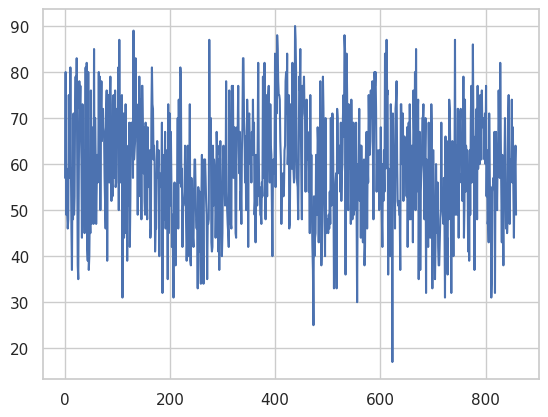

In [ ]:
df.award_age.plot()

Let's change it to get `kind="hist"`

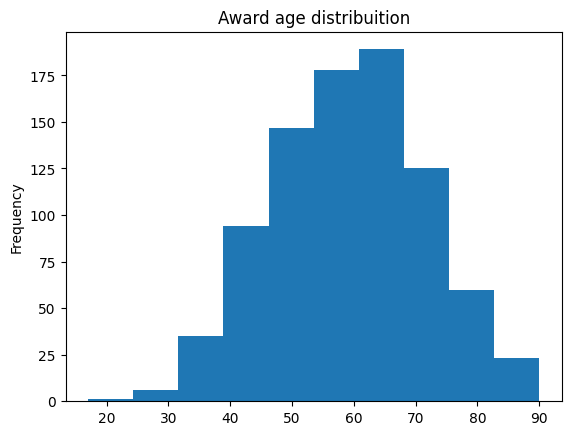

In [ ]:
df.award_age.plot(kind="hist", title = 'Award age distribuition')
plt.show()

<Axes: title={'center': 'Award age distribuition'}>

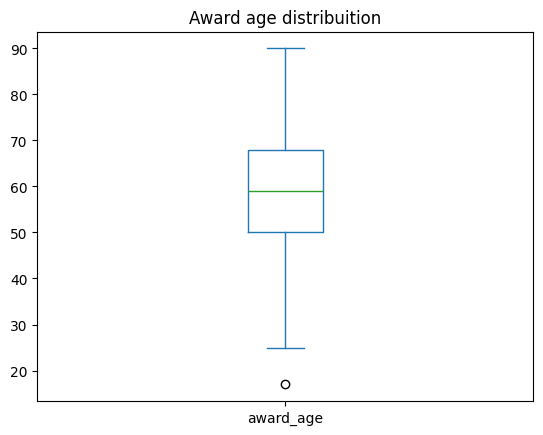

In [ ]:
df.award_age.plot(kind='box', title = 'Award age distribuition')


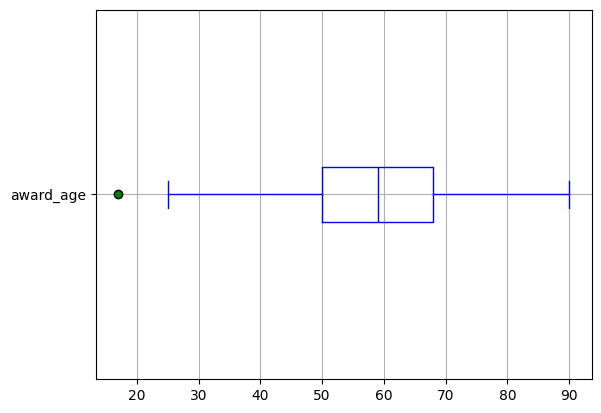

In [ ]:
ax = df.award_age.plot(kind='box', color='blue', vert=False, flierprops={'marker':'o', 'color':'red', 'markerfacecolor':'green'})
plt.grid(True)
plt.show()


We can use it also for categorical data

In [ ]:
df['category'].plot(kind='bar')

TypeError: no numeric data to plot

In [ ]:
df['category'].value_counts()

category
Physiology or Medicine    202
Physics                   201
Chemistry                 171
Literature                106
Peace                     103
Economics                  75
Name: count, dtype: int64

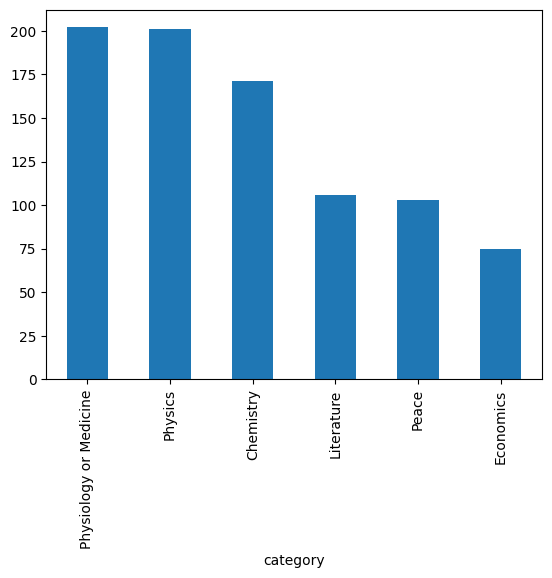

In [ ]:
# So with the right Series at hand all that's left is to call the Series' plot() method (which is a Series tailored
# matplotib function):
x = df['category'].value_counts();
x.plot(kind='bar')
plt.show()

<Axes: >

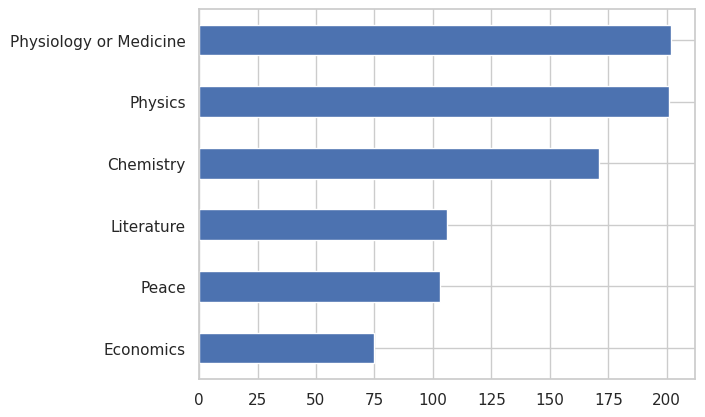

In [ ]:
# Here we do a horizontal bar plotting (kind='barh') and we need to sort the counts in ascending order
# if we want the largest value be plotted the first from top:
df['category'].value_counts(ascending = True).plot(kind='barh')

<Axes: ylabel='category'>

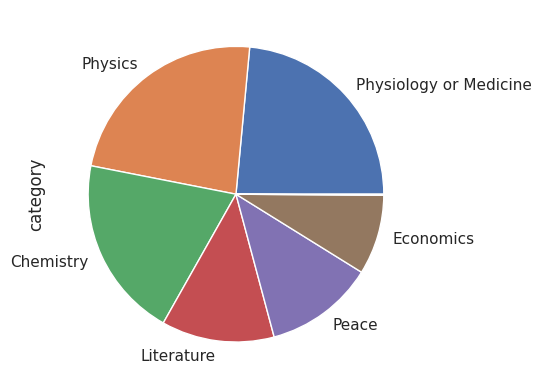

In [ ]:
df['category'].value_counts().plot(kind='pie')

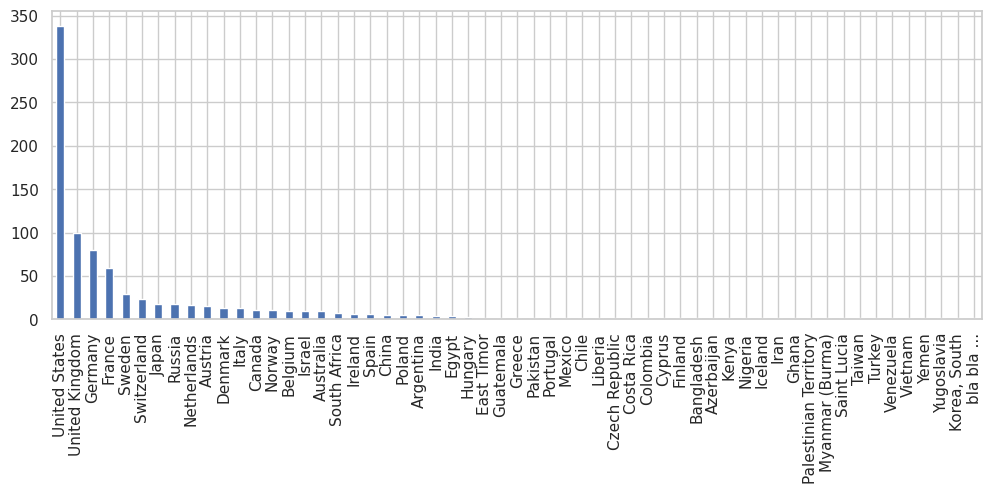

In [ ]:
# Here, just for comparison, we return to use the Series.plot() - matplotlib's method - giving it one more
# input paramater: figsize.
# The deafault orientation of the X ticks is 90 degrees.
df['country'].value_counts().plot(kind='bar',figsize=(12,4))
plt.show()

### 🔧 Customizing the Plot – X Tick Rotation, Grid, and Label Size

When plotting bar charts with many categories, labels on the x-axis can become cluttered.  
Here’s a quick summary of how to improve the plot’s readability:

| Code line | What it does |
|-----------|---------------|
| `set_xticklabels(..., rotation=30)` | Rotates the x-axis labels to 30° for better readability |
| `grid(False)` | Removes the default background gridlines from the plot |
| `tick_params(labelsize=6)` | Reduces the font size of axis ticks to make space and avoid overlap |

You can use all of these together after assigning the plot to an `ax` object:

```python
ax = df['country'].value_counts().plot(kind='bar', figsize=(18, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.grid(False)
ax.tick_params(labelsize=6)


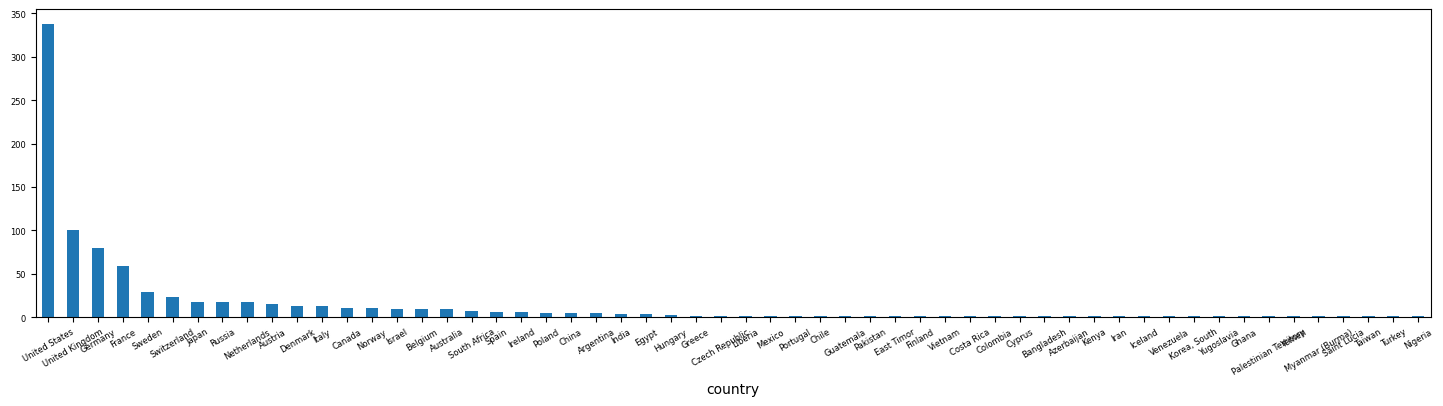

In [ ]:
# In this cell we repeat the same plotting as above, but this time we want to change the X ticks orientation
# For that, we need the axes object which we can get from the plotting function (in other words, when you
# run one of a matplotlib's plottng functions, you can count on it to return to you an 'axes' object that
# refers to the where the plottong took place)
ax = df['country'].value_counts().plot(kind='bar',figsize=(18,4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.grid(False)
ax.tick_params(labelsize=6)

# The last command was used to remove the default gridlines from the plot
# The result, doesn't look that good.

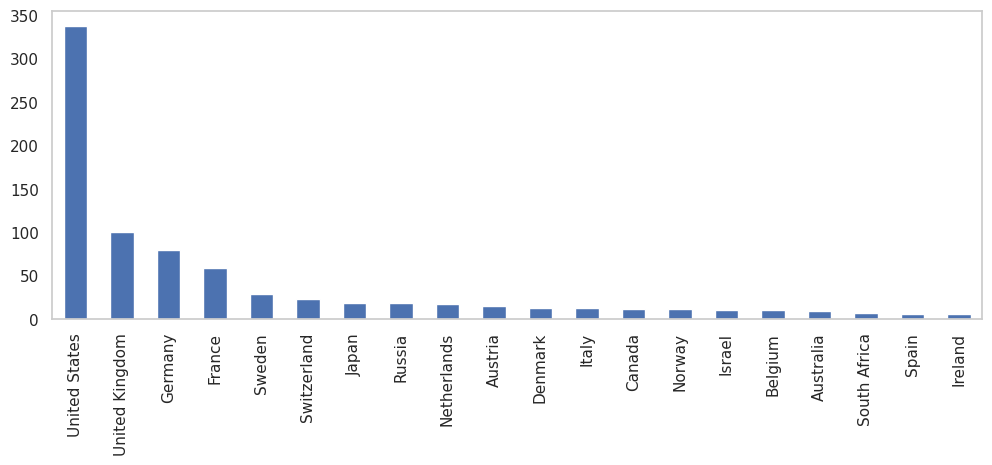

In [ ]:
# As the 45 degree doesn't show well, we return to the default vertical X tick plotting.
# This time, we want to show only the top 20 countries in terms of the number of prizes
ax = df['country'].value_counts()[:20].plot(kind='bar',figsize=(12,4))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.grid(False)

## Joining two dataframes

In the last plot from above, we saw the absolute number of prises each country won.<br>
When we analyze data, there are a lot of situations in which absolute numbers cannot be effectively compared - therefore we want to move to __ratios__.
In our case it will be useful to understand how many prises each country won, relative to its population size. <br>

Our dataframe does not contain the population size of the countries - we will need to bring it from somwhere else.

Reading a json with the country population

In [ ]:
# We create now a new DF by populating it with data coming from another JSON file
cnt = pd.read_json("/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/CountryData.json")

In [ ]:
cnt.head()

,country,gini,name,alpha3Code,area,latlng,capital,population
0,Turkey,39.0,Turkey,TUR,783562.0,"[39.0, 35.0]",Ankara,76667864
1,East Timor,31.9,East Timor,TLS,14874.0,"[-8.83333333, 125.91666666]",Dili,1172390
2,Italy,36.0,Italy,ITA,301336.0,"[42.83333333, 12.83333333]",Rome,60769102
3,Czech Republic,26.0,Czech Republic,CZE,78865.0,"[49.75, 15.5]",Prague,10521600
4,Canada,32.6,Canada,CAN,9984670.0,"[60.0, -95.0]",Ottawa,35540419


In [ ]:
cnt.sample(5)

,country,gini,alpha3Code,area,latlng,capital,population
44,Mexico,47.0,MEX,1964375.0,"[23.0, -102.0]",Mexico City,119713203
32,Macedonia,43.2,MKD,25713.0,"[41.83333333, 22.0]",Skopje,2058539
35,Vietnam,35.6,VNM,331212.0,"[16.16666666, 107.83333333]",Hanoi,89708900
4,Canada,32.6,CAN,9984670.0,"[60.0, -95.0]",Ottawa,35540419
17,Australia,30.5,AUS,7692024.0,"[-27.0, 133.0]",Canberra,23696900


In [ ]:
# It appears that cnt has both 'country' and 'name' columns which seem to be identical
# check this, and if it is true, remove the 'name' one
if len(cnt[cnt.country != cnt.name]) == 0:
    cnt = cnt.drop(['name'],axis=1)

In [ ]:
# Before merging this country data with the prize count in 'df_aggr_country'
# we check that the all population entries have values:
if len(cnt[cnt.population.isnull()]) > 0:
    print ("Not all entries in this DF have population value")
else:
    print ("Ok, all country entries have population value")

Ok, all country entries have population value


In [ ]:
# What is the highest age of winner for each category
df.groupby('category').award_age.max()

category
Chemistry                 85
Economics                 90
Literature                88
Peace                     87
Physics                   88
Physiology or Medicine    87
Name: award_age, dtype: int64

In [ ]:
# How many rows for each country
df.groupby('country').size()

country
Argentina                  5
Australia                  9
Austria                   15
Azerbaijan                 1
Bangladesh                 1
Belgium                   10
Canada                    11
Chile                      2
China                      5
Colombia                   1
Costa Rica                 1
Cyprus                     1
Czech Republic             2
Denmark                   13
East Timor                 2
Egypt                      4
Finland                    1
France                    59
Germany                   80
Ghana                      1
Greece                     2
Guatemala                  2
Hungary                    3
Iceland                    1
India                      4
Iran                       1
Ireland                    6
Israel                    10
Italy                     13
Japan                     18
Kenya                      1
Korea, South               1
Liberia                    2
Mexico                     2
Myanma

### 🧮 Counting Prizes per Country using `groupby()` and `size()`

To count how many Nobel prizes were awarded to winners from each country, we can use this command:

```python
df_aggr_country = df.groupby('country').size().reset_index(name='prises')

```

groupby('country') groups the data by country

.size() counts how many times each country appears (i.e., how many prizes)

.reset_index(name='prises') converts the result into a clean DataFrame

In [ ]:
# Note, that there is a simpler way to achieve this country-count DF using the groupby() and size() methods
# instead of the value_count() method:
df_aggr_country = df.groupby('country').size().reset_index(name='prises')
df_aggr_country

,country,prises
0,Argentina,5
1,Australia,9
2,Austria,15
3,Azerbaijan,1
4,Bangladesh,1
5,Belgium,10
6,Canada,11
7,Chile,2
8,China,5
9,Colombia,1


### 🔗 Merging DataFrames with `pd.merge()` – Full Explanation

We often need to combine two DataFrames based on a shared column. For example, suppose we have:

- `df_aggr_country`: a DataFrame containing the number of Nobel prizes per country
- `cnt`: a DataFrame with additional country details (such as population, region, etc.)

We can merge them using:

```python
df1 = pd.merge(df_aggr_country, cnt, how='inner', on='country')


pd.merge(...): The function used to combine two DataFrames.

df_aggr_country: The left DataFrame in the merge (appears first).

cnt: The right DataFrame in the merge (appears second).

on='country': Specifies that the common column to merge on is 'country'.
If the column names were different, you could use left_on='col1', right_on='col2'.

how='inner': Defines the type of join. 'inner' keeps only rows that exist in both DataFrames.



In [ ]:
# We now want to add country related info to the country prize count DF
# We use inner join that will leave only the entries that exists in BOTH DFs.
# Since both DFs have the 'country' column, and it is this column that we want to merge on, we
# specifiy it's name in the 'on' parameter (the merging columns could have had different names and there
# is a way to say this explicitly)
# When doing pd.merge() on the two dataframes, the result is a (merged) DF. You can look at the documentation on the
# WEB to see the different merge types possible (the 'how' paramater)
df1 = pd.merge(df_aggr_country,cnt, how='inner',on='country')
df1.head(3)

,country,prises,gini,alpha3Code,area,latlng,capital,population
0,Argentina,5,44.5,ARG,2780400.0,"[-34.0, -64.0]",Buenos Aires,42669500
1,Australia,9,30.5,AUS,7692024.0,"[-27.0, 133.0]",Canberra,23696900
2,Austria,15,26.0,AUT,83871.0,"[47.33333333, 13.33333333]",Vienna,8527230


### 🔄 Merge types (`how` parameter) – Text Explanation

There are four main types of joins you can use with the `how` parameter in `pd.merge()`:

- **`'inner'`** – This is the default option. It performs an **intersection** between the two DataFrames.  
  Only rows where the merge key (e.g., `'country'`) exists in **both** DataFrames will be kept.

- **`'left'`** – Performs a **left join**, keeping **all rows from the left DataFrame**.  
  If there's a match in the right DataFrame, the data is added. If not, missing values are filled with `NaN`.

- **`'right'`** – Performs a **right join**, keeping **all rows from the right DataFrame**.  
  Like the left join, it adds matching values from the left and fills in `NaN` for unmatched rows.

- **`'outer'`** – Performs a **full outer join** (a union of both DataFrames).  
  All rows from both DataFrames are kept. If a match is missing on one side, the missing fields are filled with `NaN`.

🧠 Choose the appropriate join type based on whether you want to keep only shared data, preserve all from one side, or include everything even if it doesn’t match.


In [ ]:
# We evaluate a new 'ppc' (Prizes per 1 million people) column
df1['ppc'] = 1000000*df1['prises'].astype(float)/df1.population

In [ ]:
df1.head()

,country,prises,gini,alpha3Code,area,latlng,capital,population,ppc
0,Argentina,5,44.5,ARG,2780400.0,"[-34.0, -64.0]",Buenos Aires,42669500,0.117180
1,Australia,9,30.5,AUS,7692024.0,"[-27.0, 133.0]",Canberra,23696900,0.379797
2,Austria,15,26.0,AUT,83871.0,"[47.33333333, 13.33333333]",Vienna,8527230,1.759071
3,Azerbaijan,1,33.7,AZE,86600.0,"[40.5, 47.5]",Baku,9552500,0.104685
4,Bangladesh,1,32.1,BGD,147570.0,"[24.0, 90.0]",Dhaka,157486000,0.006350


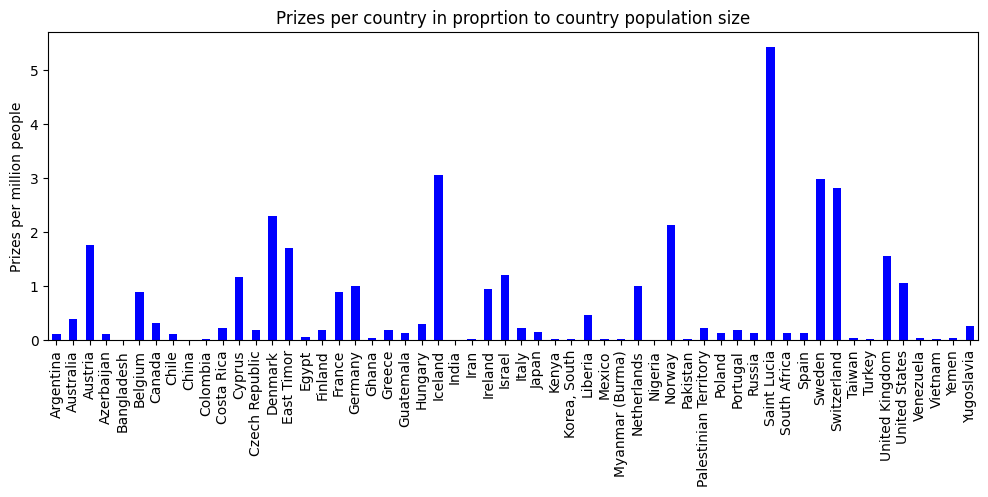

In [ ]:
# Creating a bar plot
ax = df1.plot(kind='bar', x='country', y='ppc', color='blue', legend=False,figsize=(12,4))

# Setting titles and labels
ax.set_title('Prizes per country in proprtion to country population size')
ax.set_xlabel('')
ax.set_ylabel('Prizes per million people')

# Show the plot
plt.show()


In [ ]:
# Sorting the dataframe by ppc
df1 = df1.sort_values(by='ppc', ascending=False)


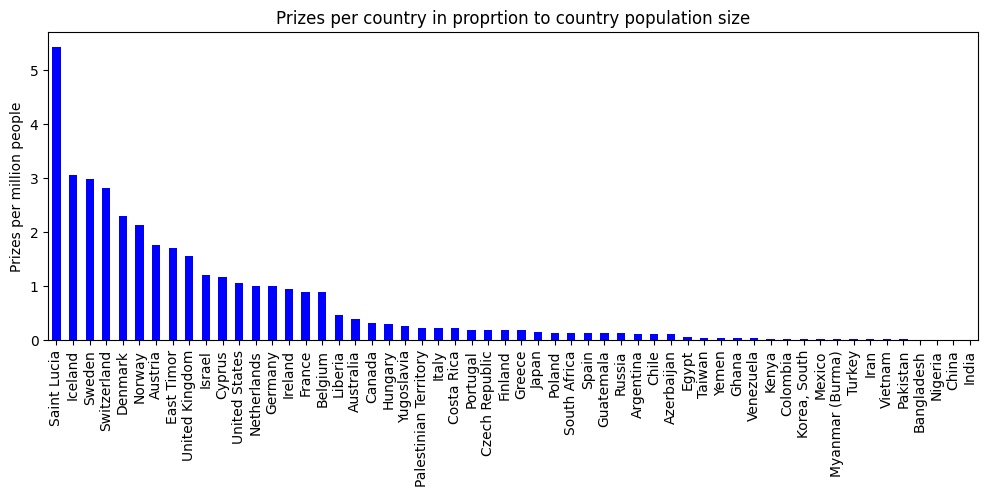

In [ ]:
# Creating a bar plot
ax = df1.plot(kind='bar', x='country', y='ppc', color='blue', legend=False,figsize=(12,4))

# Setting titles and labels
ax.set_title('Prizes per country in proprtion to country population size')
ax.set_xlabel('')
ax.set_ylabel('Prizes per million people')

# Show the plot
plt.show()


### Changing Pandas settings

The function `pd.set_option('display.max_columns', None)` is used to change the display settings in Pandas to show all columns when printing a DataFrame. This is particularly useful when working with wide datasets, as it ensures that you can view all columns without truncation, making it easier to explore and analyze the full structure of the DataFrame.

In [ ]:
# setting pandas to show all columns
pd.set_option('display.max_columns', None)

# Set pandas to display all rows
pd.set_option('display.max_rows', None)